<a href="https://colab.research.google.com/github/Seo-Hongju/Hong_test_git01/blob/master/05_Karas1_lec_%EC%84%9C%ED%99%8D%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## load MNIST data

In [0]:
# 임포트하기, 사용할 패키지 불러오기
import keras
from keras.datasets import mnist
from keras.models import Sequential

In [0]:
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam

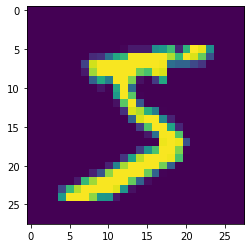

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
predict_data = x_train[0]

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
# 데이터셋 생성하기
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [0]:
num_classes = 10

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train', x_train[0])
print('y_train', y_train[0])

x_train [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

## Create Model

##### 모델 구성하기

In [0]:
model = Sequential()

In [0]:
model.add(Dense(512, activation='relu', input_shape=(784,))) # input layer
model.add(Dense(512, activation='relu')) # hidden layer1
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.00001), metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Model fit

In [0]:
import tensorflow as tf

batch_size = 128
epochs = 10
with tf.device('/device:GPU:0'):
#   history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test), callbacks=[tbCallBack])
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 11s 180us/step - loss: 1.7111 - acc: 0.6212 - val_loss: 1.1299 - val_acc: 0.8159
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.8130 - acc: 0.8410 - val_loss: 0.5599 - val_acc: 0.8799
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.4930 - acc: 0.8808 - val_loss: 0.4065 - val_acc: 0.9001
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.3909 - acc: 0.8977 - val_loss: 0.3449 - val_acc: 0.9101
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.3418 - acc: 0.9076 - val_loss: 0.3101 - val_acc: 0.9161
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.3113 - acc: 0.9145 - val_loss: 0.2880 - val_acc: 0.9210
Epoch 7/10
60000/60000 [

In [0]:
  # 모델 평가하기
  score = model.evaluate(x_test, y_test, verbose=0)
  print(model.metrics_names)
  print('test loss: ', score[0])
  print('test acc: ', score[1])

['loss', 'acc']
test loss:  0.23394047690033912
test acc:  0.9349


In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(history.history)

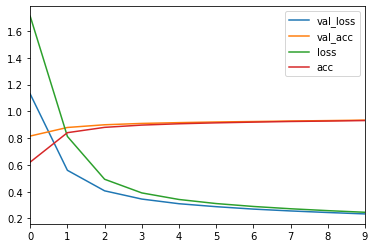

In [0]:
# 평가 결과
df = pd.DataFrame(history.history)
df.plot()